In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096*2
FOV = 10e-3
dx = FOV/N

E0 = 9000

beam_params = {
    'photonEnergy': E0+0.,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 159.9,
    'z0y': 159.9,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

alphaAsym = 7.7*np.pi/180
im0 = optics.PPM('im0', z=789.9, FOV=2e-3, N=256)

crystal1 = optics.Crystal('c1', hkl=[1,1,1], length=1e-2, width=20e-3, z=790, E0=E0,
                          alphaAsym=0, orientation=0,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.1, E0=E0,alphaAsym=alphaAsym, 
                          orientation=2,pol='p')
print(crystal2.alpha*180/np.pi)
print(crystal2.beta0*180/np.pi)

im1 = optics.PPM('im1', z=790.15,N=256,FOV=2e-3)

m1 = optics.CurvedMirror('m1', z=790.2, p=10, q=0.3, alpha=3e-3, length=.1, orientation=0)
crl1 = optics.CRL('c1', z=790.2, roc=2.45e-6)
focus = optics.PPM('focus', z=790.50, FOV=40e-6, N=256)
m2 = optics.CurvedMirror('m2', z=790.8, p=0.3000, q=1e4, alpha=3e-3, length=.1, orientation=2)
crl2 = optics.CRL('c2', z=790.8, roc=2.524e-6)

crystal3 = optics.Crystal('c3', hkl=[1,1,1], length=1e-2, width=20e-3, z=790.9, E0=E0,alphaAsym=0, orientation=2,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[1,1,1], length=1e-2, width=20e-3, z=791, E0=E0,alphaAsym=-alphaAsym, 
                          asym_type='emergence', orientation=0,pol='p')

im2 = optics.PPM('im2', z=791.2, FOV=2e-3, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [im0,crystal1,crystal2,im1, crl1, focus, crl2, crystal3, crystal4, im2]
# devices = [crystal1,crystal2,im1, m1, focus, m2,crystal3, crystal4, im2]
# devices = devices + crl_list

mono_beamline = beamline.Beamline(devices)

FWHM in x: 551.9400955834157 microns
FWHM in y: 551.9400955834157 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130423486709137
5.130423486709137
b 1.00
b 4.00
20.391319986069636
4.995667149144264
b 1.00
b 0.25
after c1: 0.44
after c2: -0.00
after c3: -0.44
after c4: -0.00


im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.000691
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.050691
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: 10.100691
zy: 160.210686
azimuth -0.05 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299828
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000172
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000172
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300172
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 1.56e+03
zRy: 1.1

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


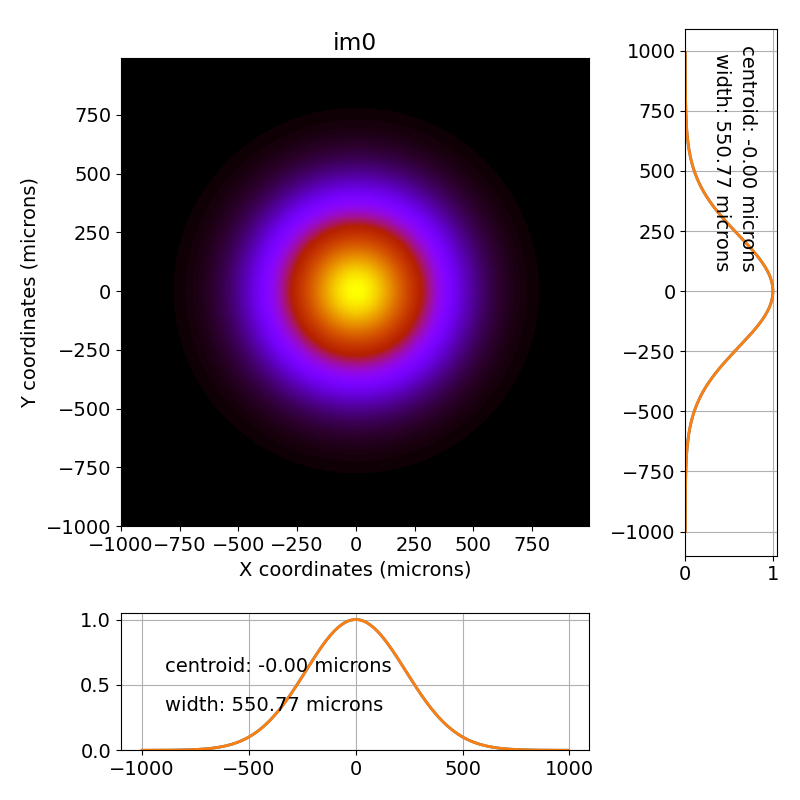

<IPython.core.display.Javascript object>


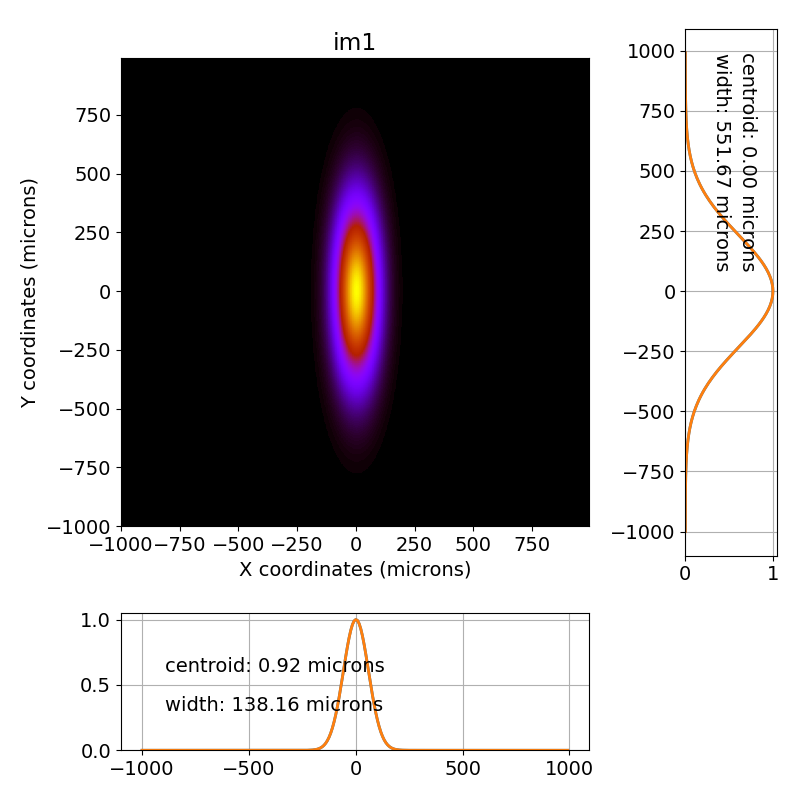

<IPython.core.display.Javascript object>


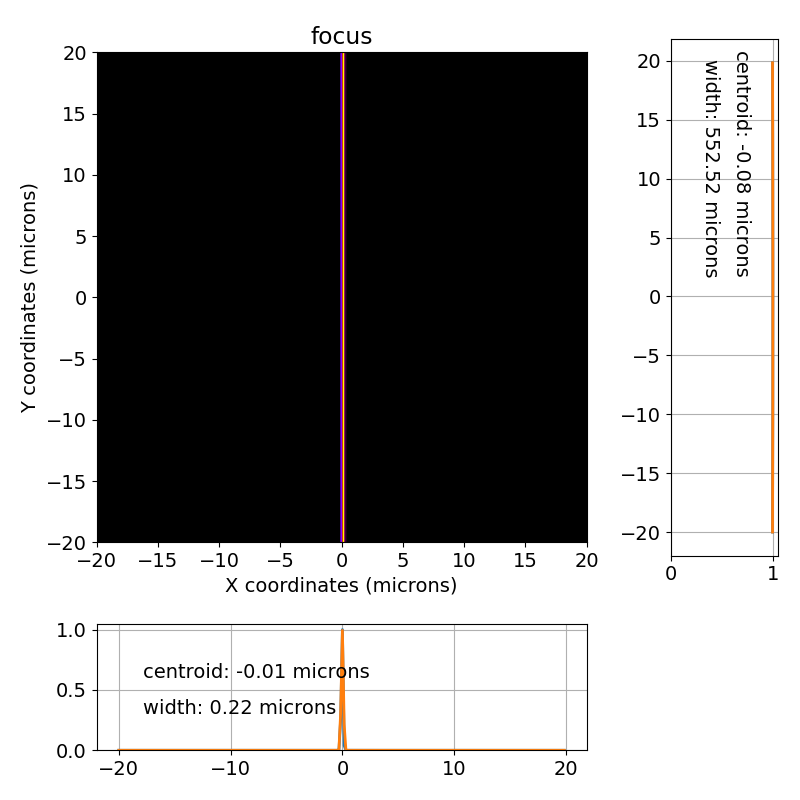

<IPython.core.display.Javascript object>


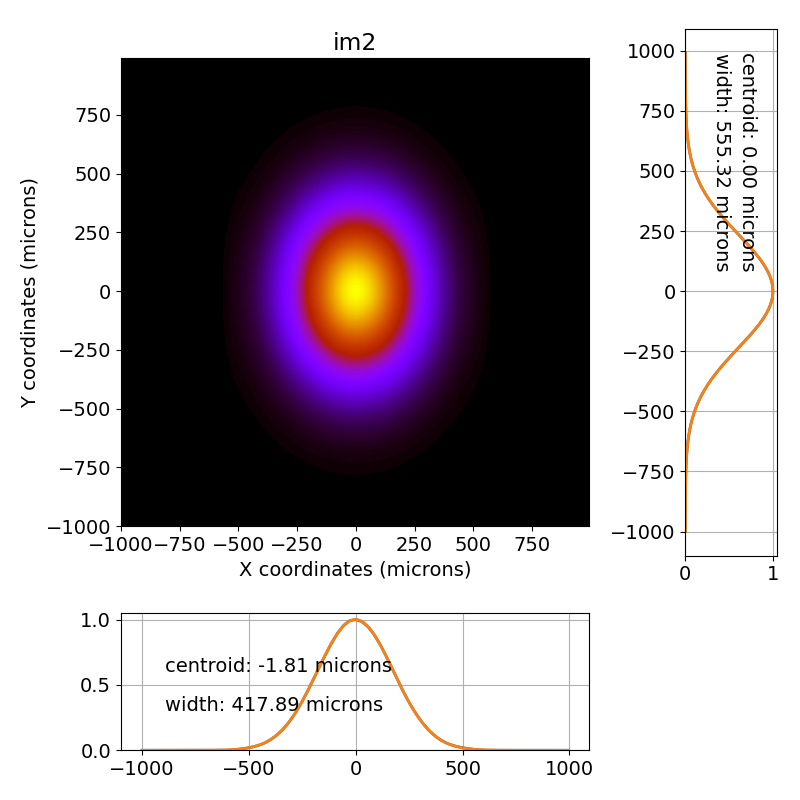

In [4]:
b2 = mono_beamline.propagate_beamline(b1)
mono_beamline.im0.view_beam()
mono_beamline.im1.view_beam()
mono_beamline.focus.view_beam()
mono_beamline.im2.view_beam()

In [18]:
beam_params['photonEnergy'] = 9000

pulse_test = beam.Pulse(beam_params=beam_params, tau=4, time_window=500)

In [19]:
pulse_test.propagate(beamline=mono_beamline, screen_names=['im0','im1','focus'])

FWHM in x: 552.0113210935242 microns
FWHM in y: 552.0113210935242 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129760831569117
5.129760831569117
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.980709
zy: 160.110686
azimuth 0.03 mrad
drift3
delta z: -0.00
zx: 10.030709
zy: 160.160686
azimuth 0.03 mrad
im1
zx: 10.030709
zy: 160.160686
azimuth 0.03 mrad
drift4
delta z: -0.00
zx: 10.080709
zy: 160.210686
azimuth 0.03 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299770
zy: 160.210686
azimuth 0.00 mrad
drift5
delta z: -0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000230
zy: 160.510686
azimuth 0.00 mrad
focus
zx: 0.000230
zy: 160.510686
azimuth 0.00 mrad
dr

/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


zRx: 5.70e+01
zRy: 1.18e+01
zx: -4493.969109
zy: 161.021093
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -4493.768844
zy: 161.221358
azimuth -0.03 mrad
im2
zx: -4493.768844
zy: 161.221358
azimuth -0.03 mrad
FWHM in x: 552.0097946395591 microns
FWHM in y: 552.0097946395591 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129775031322119
5.129775031322119
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.981137
zy: 160.110686
azimuth 0.03 mrad
drift3
delta z: -0.00
zx: 10.031137
zy: 160.160686
azimuth 0.03 mrad
im1
zx: 10.031137
zy: 160.160686
azimuth 0.03 mrad
drift4
delta z: -0.00
zx: 10.081137
zy: 160.210686
azimuth 0.03 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299772
zy: 160.210686
azimu

zx: 0.000226
zy: 160.510686
azimuth -0.00 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300226
zy: 160.810686
azimuth -0.00 mrad
c2
zRx: 5.86e+02
zRy: 1.18e+01
focal length: 0.30
zx: -285.161117
zy: 160.810686
azimuth -0.14 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -285.061261
zy: 160.910542
azimuth -0.14 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -285.061261
zy: 160.910542
azimuth -443.01 mrad
drift8
delta z: 0.95
zx: -284.950697
zy: 161.021106
azimuth -443.01 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -4572.824252
zy: 161.021106
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -4572.623999
zy: 161.221359
azimuth -0.03 mrad
im2
zx: -4572.623999
zy: 161.221359
azimuth -0.03 mrad
FWHM in x: 552.0067417569948 microns
FWHM in y: 552.0067417569948 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.129803430828118
5.129803430828118
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 m

zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.982708
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.032708
zy: 160.160686
azimuth 0.02 mrad
im1
zx: 10.032708
zy: 160.160686
azimuth 0.02 mrad
drift4
delta z: -0.00
zx: 10.082708
zy: 160.210686
azimuth 0.02 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299776
zy: 160.210686
azimuth -0.00 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000224
zy: 160.510686
azimuth -0.00 mrad
focus
zx: 0.000224
zy: 160.510686
azimuth -0.00 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300224
zy: 160.810686
azimuth -0.00 mrad
c2
zRx: 6.07e+02
zRy: 1.18e+01
focal length: 0.30
zx: -290.276003
zy: 160.810686
azimuth -0.13 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -290.176141
zy: 160.910548
azimuth -0.13 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -290.176141
zy: 160.910548
azimuth -443.01

zx: 0.300222
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 6.26e+02
zRy: 1.18e+01
focal length: 0.30
zx: -294.680859
zy: 160.810686
azimuth -0.13 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -294.580991
zy: 160.910554
azimuth -0.13 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -294.580991
zy: 160.910554
azimuth -443.01 mrad
drift8
delta z: 0.95
zx: -294.470416
zy: 161.021128
azimuth -443.01 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -4724.859021
zy: 161.021128
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -4724.658789
zy: 161.221360
azimuth -0.03 mrad
im2
zx: -4724.658789
zy: 161.221360
azimuth -0.03 mrad
FWHM in x: 552.0011448934633 microns
FWHM in y: 552.0011448934633 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.12985549658912
5.12985549658912
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.984278
zy: 160.110686
azimuth 0.02 mrad
drift3
delta z: -0.00
zx: 10.034278
zy: 160.160686
azimuth 0.02 mrad
im1
zx: 10.034278
zy: 160.160686
azimuth 0.02 mrad
drift4
delta z: -0.00
zx: 10.084278
zy: 160.210686
azimuth 0.02 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299781
zy: 160.210686
azimuth -0.01 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000219
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000219
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300219
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 6.49e+02
zRy: 1.18e+01
focal length: 0.30
zx: -300.146618
zy: 160.810686
azimuth -0.13 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfoc

zx: 10.084991
zy: 160.210686
azimuth 0.01 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299783
zy: 160.210686
azimuth -0.01 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000217
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000217
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300217
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 6.69e+02
zRy: 1.18e+01
focal length: 0.30
zx: -304.858902
zy: 160.810686
azimuth -0.12 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -304.759022
zy: 160.910566
azimuth -0.12 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -304.759022
zy: 160.910566
azimuth -443.02 mrad
drift8
delta z: 0.95
zx: -304.648437
zy: 161.021151
azimuth -443.02 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -4887.407434
zy: 161.021151
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -4887.207223
zy: 161.221362
a

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.985705
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.035705
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.035705
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -0.00
zx: 10.085705
zy: 160.210686
azimuth 0.01 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299785
zy: 160.210686
azimuth -0.01 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000215
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000215
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300215
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 6.91e+02
zRy: 1.18e+01
focal length: 0.30
zx: -309.721669
zy: 160.810686
azimuth -0.12 mrad
drift7
delta z: 1.10
x becomes focused
y stays unfocused
x remains focused
y stays unfoc

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.34e-01
zRy: 1.18e+01
zx: 9.986561
zy: 160.110686
azimuth 0.01 mrad
drift3
delta z: -0.00
zx: 10.036561
zy: 160.160686
azimuth 0.01 mrad
im1
zx: 10.036561
zy: 160.160686
azimuth 0.01 mrad
drift4
delta z: -0.00
zx: 10.086561
zy: 160.210686
azimuth 0.01 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299787
zy: 160.210686
azimuth -0.01 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000213
zy: 160.510686
azimuth -0.01 mrad
focus
zx: 0.000213
zy: 160.510686
azimuth -0.01 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300213
zy: 160.810686
azimuth -0.01 mrad
c2
zRx: 7.18e+02
zRy: 1.18e+01
f

FWHM in x: 551.9879163951484 microns
FWHM in y: 551.9879163951484 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1299785611151245
5.1299785611151245
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.987275
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.037275
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037275
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -0.00
zx: 10.087275
zy: 160.210686
azimuth 0.00 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299789
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000211
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000211
zy: 160.510686
azimuth -0.02 mra

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.987989
zy: 160.110686
azimuth 0.00 mrad
drift3
delta z: -0.00
zx: 10.037989
zy: 160.160686
azimuth 0.00 mrad
im1
zx: 10.037989
zy: 160.160686
azimuth 0.00 mrad
drift4
delta z: -0.00
zx: 10.087989
zy: 160.210686
azimuth 0.00 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299791
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000209
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000209
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300209
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 7.67e+02
zRy: 1.18e+01
focal length: 0.30
zx: -326.382253
zy: 160.810686
azimuth -0.11 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -326.282350
zy: 160.910589
azimuth -0.11 mrad
c3
zRx: 

zx: 0.300207
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 7.94e+02
zRy: 1.18e+01
focal length: 0.30
zx: -331.962936
zy: 160.810686
azimuth -0.11 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -331.863028
zy: 160.910594
azimuth -0.11 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -331.863028
zy: 160.910594
azimuth -443.03 mrad
drift8
delta z: 0.95
zx: -331.752418
zy: 161.021204
azimuth -443.03 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -5320.273512
zy: 161.021204
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -5320.073351
zy: 161.221365
azimuth -0.03 mrad
im2
zx: -5320.073351
zy: 161.221365
azimuth -0.03 mrad
FWHM in x: 551.9823199139435 microns
FWHM in y: 551.9823199139435 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130030626876125
5.130030626876125
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx

zx: 10.039559
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: 0.00
zx: 10.089559
zy: 160.210686
azimuth -0.01 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299796
zy: 160.210686
azimuth -0.02 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000204
zy: 160.510686
azimuth -0.02 mrad
focus
zx: 0.000204
zy: 160.510686
azimuth -0.02 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300204
zy: 160.810686
azimuth -0.02 mrad
c2
zRx: 8.27e+02
zRy: 1.18e+01
focal length: 0.30
zx: -338.917196
zy: 160.810686
azimuth -0.10 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -338.817281
zy: 160.910601
azimuth -0.10 mrad
c3
zRx: 3.55e+00
zRy: 1.18e+01
x becomes unfocused
zx: -338.817281
zy: 160.910601
azimuth -443.04 mrad
drift8
delta z: 0.95
zx: -338.706666
zy: 161.021216
azimuth -443.04 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -5431.337042
zy: 161.021216
azim

zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.990415
zy: 160.110686
azimuth -0.01 mrad
drift3
delta z: 0.00
zx: 10.040415
zy: 160.160686
azimuth -0.01 mrad
im1
zx: 10.040415
zy: 160.160686
azimuth -0.01 mrad
drift4
delta z: 0.00
zx: 10.090415
zy: 160.210686
azimuth -0.01 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299798
zy: 160.210686
azimuth -0.03 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000202
zy: 160.510686
azimuth -0.03 mrad
focus
zx: 0.000202
zy: 160.510686
azimuth -0.03 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300202
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 8.63e+02
zRy: 1.18e+01
focal length: 0.30
zx: -346.169343
zy: 160.810686
azimuth -0.10 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unf

x remains focused
y stays unfocused
zx: -352.354483
zy: 160.910613
azimuth -0.10 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -352.354483
zy: 160.910613
azimuth -443.05 mrad
drift8
delta z: 0.95
zx: -352.243857
zy: 161.021238
azimuth -443.05 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -5647.534362
zy: 161.021238
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -5647.334233
zy: 161.221367
azimuth -0.03 mrad
im2
zx: -5647.334233
zy: 161.221367
azimuth -0.03 mrad
FWHM in x: 551.9736710301818 microns
FWHM in y: 551.9736710301818 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130111092143128
5.130111092143128
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.991271
zy: 160.110686
azimuth -0.01 mrad
drift3


zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.991985
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.041985
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.041985
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 10.091985
zy: 160.210686
azimuth -0.02 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299803
zy: 160.210686
azimuth -0.03 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000197
zy: 160.510686
azimuth -0.03 mrad
focus
zx: 0.000197
zy: 160.510686
azimuth -0.03 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300197
zy: 160.810686
azimuth -0.03 mrad
c2
zRx: 9.35e+02
zRy: 1.18e+01
focal length: 0.30
zx: -360.304737


zx: -5859.444190
zy: 161.221368
azimuth -0.03 mrad
im2
zx: -5859.444190
zy: 161.221368
azimuth -0.03 mrad
FWHM in x: 551.9685835783008 microns
FWHM in y: 551.9685835783008 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130158424653129
5.130158424653129
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.992699
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.042699
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.042699
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 10.092699
zy: 160.210686
azimuth -0.02 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299805
zy: 160.210686
azimuth -0.03 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays un

zx: -374.096493
zy: 160.910630
azimuth -443.06 mrad
drift8
delta z: 0.94
zx: -373.985852
zy: 161.021271
azimuth -443.06 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -5994.768007
zy: 161.021271
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -5994.567909
zy: 161.221369
azimuth -0.03 mrad
im2
zx: -5994.567909
zy: 161.221369
azimuth -0.03 mrad
FWHM in x: 551.9655311522561 microns
FWHM in y: 551.9655311522561 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13018682415913
5.13018682415913
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.993555
zy: 160.110686
azimuth -0.02 mrad
drift3
delta z: 0.00
zx: 10.043555
zy: 160.160686
azimuth -0.02 mrad
im1
zx: 10.043555
zy: 160.160686
azimuth -0.02 mrad
drift4
delta z: 0.00
zx: 

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.994411
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.044411
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.044411
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: 0.00
zx: 10.094411
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299810
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000190
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000190
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300190
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 1.06e+03
zRy: 1.18e+01
focal length: 0.30
zx: -384.576249


zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.995125
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.045125
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.045125
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: 0.00
zx: 10.095125
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299812
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000188
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000188
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300188
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 1.11e+03
zRy: 1.18e+01
focal length: 0.30
zx: -392.350392


zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.995981
zy: 160.110686
azimuth -0.03 mrad
drift3
delta z: 0.00
zx: 10.045981
zy: 160.160686
azimuth -0.03 mrad
im1
zx: 10.045981
zy: 160.160686
azimuth -0.03 mrad
drift4
delta z: 0.00
zx: 10.095981
zy: 160.210686
azimuth -0.03 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299814
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000186
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000186
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300186
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 1.16e+03
zRy: 1.18e+01
focal length: 0.30
zx: -402.104912
zy: 160.810686
azimuth -0.08 mrad
drift7
delta z: 1.09
x becomes focused
y stays unf

zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.996837
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.046837
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.046837
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: 0.00
zx: 10.096837
zy: 160.210686
azimuth -0.04 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299817
zy: 160.210686
azimuth -0.04 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000183
zy: 160.510686
azimuth -0.04 mrad
focus
zx: 0.000183
zy: 160.510686
azimuth -0.04 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300183
zy: 160.810686
azimuth -0.04 mrad
c2
zRx: 1.22e+03
zRy: 1.18e+01
focal length: 0.30
zx: -412.357230
zy: 160.810686
azimuth -0.07 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -412.257259
zy: 160.910657
azimuth -0.07 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -412.257259
zy: 160.910657
azimuth -443.

zx: -6746.989598
zy: 161.221372
azimuth -0.03 mrad
FWHM in x: 551.9507782363545 microns
FWHM in y: 551.9507782363545 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130324088438134
5.130324088438134
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.997694
zy: 160.110686
azimuth -0.04 mrad
drift3
delta z: 0.00
zx: 10.047694
zy: 160.160686
azimuth -0.04 mrad
im1
zx: 10.047694
zy: 160.160686
azimuth -0.04 mrad
drift4
delta z: 0.00
zx: 10.097694
zy: 160.210686
azimuth -0.04 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299819
zy: 160.210686
azimuth -0.05 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.00018

zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -432.478720
zy: 160.910669
azimuth -443.08 mrad
drift8
delta z: 0.94
zx: -432.368046
zy: 161.021342
azimuth -443.08 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -6927.171721
zy: 161.021342
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -6926.971691
zy: 161.221373
azimuth -0.03 mrad
im2
zx: -6926.971691
zy: 161.221373
azimuth -0.03 mrad
FWHM in x: 551.9477260075397 microns
FWHM in y: 551.9477260075397 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130352487944135
5.130352487944135
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.998550
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.048550
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.048550
zy: 160.1

zRx: 5.70e+01
zRy: 1.18e+01
zx: -7117.054633
zy: 161.021355
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -7116.854614
zy: 161.221374
azimuth -0.03 mrad
im2
zx: -7116.854614
zy: 161.221374
azimuth -0.03 mrad
FWHM in x: 551.9446738125338 microns
FWHM in y: 551.9446738125338 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130380887450136
5.130380887450136
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.35e-01
zRy: 1.18e+01
zx: 9.999406
zy: 160.110686
azimuth -0.05 mrad
drift3
delta z: 0.00
zx: 10.049406
zy: 160.160686
azimuth -0.05 mrad
im1
zx: 10.049406
zy: 160.160686
azimuth -0.05 mrad
drift4
delta z: 0.00
zx: 10.099406
zy: 160.210686
azimuth -0.05 mrad
c1
zRx: 6.49e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299824
zy: 160.210686
azi

zx: 0.000174
zy: 160.510686
azimuth -0.05 mrad
focus
zx: 0.000174
zy: 160.510686
azimuth -0.05 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300174
zy: 160.810686
azimuth -0.05 mrad
c2
zRx: 1.49e+03
zRy: 1.18e+01
focal length: 0.30
zx: -454.887363
zy: 160.810686
azimuth -0.06 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -454.787369
zy: 160.910681
azimuth -0.06 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -454.787369
zy: 160.910681
azimuth -443.08 mrad
drift8
delta z: 0.94
zx: -454.676684
zy: 161.021365
azimuth -443.08 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -7283.456745
zy: 161.021365
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -7283.256735
zy: 161.221374
azimuth -0.03 mrad
im2
zx: -7283.256735
zy: 161.221374
azimuth -0.03 mrad
FWHM in x: 551.9421303425216 microns
FWHM in y: 551.9421303425216 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130404553705136
5.13040455370

FWHM in x: 551.939586895987 microns
FWHM in y: 551.939586895987 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130428219960137
5.130428219960137
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.000833
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.050833
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.050833
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: 10.100833
zy: 160.210686
azimuth -0.06 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299828
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000172
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.0001

zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -477.164460
zy: 160.910692
azimuth -443.09 mrad
drift8
delta z: 0.94
zx: -477.053766
zy: 161.021385
azimuth -443.09 mrad
c4
zRx: 5.70e+01
zRy: 1.18e+01
zx: -7640.835188
zy: 161.021385
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -7640.635198
zy: 161.221376
azimuth -0.03 mrad
im2
zx: -7640.635198
zy: 161.221376
azimuth -0.03 mrad
FWHM in x: 551.9370434729298 microns
FWHM in y: 551.9370434729298 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1304518862151385
5.1304518862151385
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.001547
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.051547
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.051547
zy: 16

zx: -7872.465082
zy: 161.221376
azimuth -0.03 mrad
im2
zx: -7872.465082
zy: 161.221376
azimuth -0.03 mrad
FWHM in x: 551.9339913962508 microns
FWHM in y: 551.9339913962508 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130480285721139
5.130480285721139
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.002403
zy: 160.110686
azimuth -0.06 mrad
drift3
delta z: 0.00
zx: 10.052403
zy: 160.160686
azimuth -0.06 mrad
im1
zx: 10.052403
zy: 160.160686
azimuth -0.06 mrad
drift4
delta z: 0.00
zx: 10.102403
zy: 160.210686
azimuth -0.06 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299833
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays u

zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.003117
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053117
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.053117
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.103117
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299835
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000165
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.000165
zy: 160.510686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300165
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 1.85e+03
zRy: 1.18e+01
focal length: 0.30
zx: -507.207611
zy: 160.810686
azimuth -0.04 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -507.107592
zy: 160.910705
azimuth -0.04 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -50

zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.003830
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.053830
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.053830
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.103830
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299837
zy: 160.210686
azimuth -0.06 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000163
zy: 160.510686
azimuth -0.06 mrad
focus
zx: 0.000163
zy: 160.510686
azimuth -0.06 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300163
zy: 160.810686
azimuth -0.06 mrad
c2
zRx: 1.95e+03
zRy: 1.18e+01
focal length: 0.30
zx: -520.823344
zy: 160.810686
azimuth -0.04 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -520.723320
zy: 160.910710
azimuth -0.04 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -520.723320
zy: 160.910710
azimuth -443

zx: -8565.760753
zy: 161.221378
azimuth -0.03 mrad
im2
zx: -8565.760753
zy: 161.221378
azimuth -0.03 mrad
FWHM in x: 551.925852690381 microns
FWHM in y: 551.925852690381 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130556017737141
5.130556017737141
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.004686
zy: 160.110686
azimuth -0.07 mrad
drift3
delta z: 0.00
zx: 10.054686
zy: 160.160686
azimuth -0.07 mrad
im1
zx: 10.054686
zy: 160.160686
azimuth -0.07 mrad
drift4
delta z: 0.00
zx: 10.104686
zy: 160.210686
azimuth -0.07 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299839
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unf

zx: -550.163016
zy: 161.021440
azimuth -443.11 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -8808.445454
zy: 161.021440
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -8808.245516
zy: 161.221379
azimuth -0.03 mrad
im2
zx: -8808.245516
zy: 161.221379
azimuth -0.03 mrad
FWHM in x: 551.9233093940961 microns
FWHM in y: 551.9233093940961 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130579683992142
5.130579683992142
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.005400
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.055400
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.055400
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.105400
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 6.48e-04
zRy: 1.18

zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299843
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000157
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000157
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300157
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 2.34e+03
zRy: 1.18e+01
focal length: 0.30
zx: -569.771338
zy: 160.810686
azimuth -0.03 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -569.671297
zy: 160.910728
azimuth -0.03 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -569.671297
zy: 160.910728
azimuth -443.11 mrad
drift8
delta z: 0.94
zx: -569.560572
zy: 161.021452
azimuth -443.11 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -9118.239528
zy: 161.021452
azimuth -0.03 mrad
drift9
delta z: -1.92
zx: -9118.039601
zy: 161.221380
azimuth -0.03 mrad
im2
zx: -9118.039601
zy: 161.221

zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.006827
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.056827
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.056827
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.106827
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299845
zy: 160.210686
azimuth -0.07 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000155
zy: 160.510686
azimuth -0.07 mrad
focus
zx: 0.000155
zy: 160.510686
azimuth -0.07 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300155
zy: 160.810686
azimuth -0.07 mrad
c2
zRx: 2.48e+03
zRy: 1.18e+0

zRx: 5.69e+01
zRy: 1.18e+01
zx: -9626.186293
zy: 161.021471
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -9625.986384
zy: 161.221381
azimuth -0.03 mrad
im2
zx: -9625.986384
zy: 161.221381
azimuth -0.03 mrad
FWHM in x: 551.9156796460918 microns
FWHM in y: 551.9156796460918 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130650682757144
5.130650682757144
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.007540
zy: 160.110686
azimuth -0.08 mrad
drift3
delta z: 0.00
zx: 10.057540
zy: 160.160686
azimuth -0.08 mrad
im1
zx: 10.057540
zy: 160.160686
azimuth -0.08 mrad
drift4
delta z: 0.00
zx: 10.107540
zy: 160.210686
azimuth -0.08 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299847
zy: 160.210686
az

zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -620.729592
zy: 160.910743
azimuth -443.12 mrad
drift8
delta z: 0.94
zx: -620.618854
zy: 161.021481
azimuth -443.12 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -9933.680633
zy: 161.021481
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -9933.480732
zy: 161.221381
azimuth -0.03 mrad
im2
zx: -9933.480732
zy: 161.221381
azimuth -0.03 mrad
FWHM in x: 551.9131364437063 microns
FWHM in y: 551.9131364437063 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1306743490121445
5.1306743490121445
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.008254
zy: 160.110686
azimuth -0.09 mrad
drift3
delta z: 0.00
zx: 10.058254
zy: 160.160686
azimuth -0.09 mrad
im1
zx: 10.058254
zy: 16

x remains focused
y stays unfocused
zx: -641.256987
zy: 160.910748
azimuth -0.02 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -641.256987
zy: 160.910748
azimuth -443.12 mrad
drift8
delta z: 0.94
zx: -641.146245
zy: 161.021491
azimuth -443.12 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -10261.519468
zy: 161.021491
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -10261.319577
zy: 161.221382
azimuth -0.03 mrad
im2
zx: -10261.319577
zy: 161.221382
azimuth -0.03 mrad
FWHM in x: 551.9105932647944 microns
FWHM in y: 551.9105932647944 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130698015267146
5.130698015267146
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.008967
zy: 160.110686
azimuth -0.09 mrad
dri

zx: 0.000147
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300147
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 3.21e+03
zRy: 1.18e+01
focal length: 0.30
zx: -667.856770
zy: 160.810686
azimuth -0.02 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -667.756701
zy: 160.910755
azimuth -0.02 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -667.756701
zy: 160.910755
azimuth -443.13 mrad
drift8
delta z: 0.94
zx: -667.645953
zy: 161.021503
azimuth -443.13 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -10684.741137
zy: 161.021503
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -10684.541257
zy: 161.221383
azimuth -0.03 mrad
im2
zx: -10684.541257
zy: 161.221383
azimuth -0.03 mrad
FWHM in x: 551.9075414810858 microns
FWHM in y: 551.9075414810858 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130726414773147
5.130726414773147
im0
zx: 159.900000
zy: 159.900000
azimuth 0.0

zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.010394
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.060394
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.060394
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: 0.00
zx: 10.110394
zy: 160.210686
azimuth -0.10 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299855
zy: 160.210686
azimuth -0.08 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000145
zy: 160.510686
azimuth -0.08 mrad
focus
zx: 0.000145
zy: 160.510686
azimuth -0.08 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300145
zy: 160.810686
azimuth -0.08 mrad
c2
zRx: 3.44e+03
zRy: 1.18e+01
focal length: 0.30
zx: -691.673180
zy: 160.810686
azimuth -0.01 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -691.573106
zy: 160.910760
azimuth -0.01 mrad
c3
zR

zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -717.151802
zy: 160.910766
azimuth -443.13 mrad
drift8
delta z: 0.94
zx: -717.041044
zy: 161.021524
azimuth -443.13 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -11473.620887
zy: 161.021524
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -11473.421027
zy: 161.221384
azimuth -0.03 mrad
im2
zx: -11473.421027
zy: 161.221384
azimuth -0.03 mrad
FWHM in x: 551.9024552500188 microns
FWHM in y: 551.9024552500188 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130773747283148
5.130773747283148
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.011250
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.061250
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.061250
zy: 1

zx: -12005.390733
zy: 161.221384
azimuth -0.03 mrad
im2
zx: -12005.390733
zy: 161.221384
azimuth -0.03 mrad
FWHM in x: 551.8994035564461 microns
FWHM in y: 551.8994035564461 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13080214678915
5.13080214678915
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.36e-01
zRy: 1.18e+01
zx: 10.012106
zy: 160.110686
azimuth -0.10 mrad
drift3
delta z: 0.00
zx: 10.062106
zy: 160.160686
azimuth -0.10 mrad
im1
zx: 10.062106
zy: 160.160686
azimuth -0.10 mrad
drift4
delta z: 0.00
zx: 10.112106
zy: 160.210686
azimuth -0.10 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299860
zy: 160.210686
azimuth -0.09 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays u

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.012962
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.062962
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.062962
zy: 160.160686
azimuth -0.11 mrad
drift4
delta z: 0.00
zx: 10.112962
zy: 160.210686
azimuth -0.11 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299863
zy: 160.210686
azimuth -0.09 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000137
zy: 160.510686
azimuth -0.09 mrad
focus
zx: 0.000137
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300137
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 4.53e+03
zRy: 1.18e+01
focal length: 0.30
zx: -793.557044
zy: 160.810686
azimuth -0.00 mra

zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -820.313814
zy: 160.910784
azimuth -443.14 mrad
drift8
delta z: 0.94
zx: -820.203040
zy: 161.021558
azimuth -443.14 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -13121.203023
zy: 161.021558
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -13121.003195
zy: 161.221386
azimuth -0.03 mrad
im2
zx: -13121.003195
zy: 161.221386
azimuth -0.03 mrad
FWHM in x: 551.8938088726825 microns
FWHM in y: 551.8938088726825 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.13085421255015
5.13085421255015
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.013676
zy: 160.110686
azimuth -0.11 mrad
drift3
delta z: 0.00
zx: 10.063676
zy: 160.160686
azimuth -0.11 mrad
im1
zx: 10.063676
zy: 160

zx: 0.000134
zy: 160.510686
azimuth -0.09 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300134
zy: 160.810686
azimuth -0.09 mrad
c2
zRx: 5.28e+03
zRy: 1.18e+01
focal length: 0.30
zx: -856.655382
zy: 160.810686
azimuth 0.00 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -856.555278
zy: 160.910790
azimuth 0.00 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -856.555278
zy: 160.910790
azimuth -443.15 mrad
drift8
delta z: 0.94
zx: -856.444500
zy: 161.021568
azimuth -443.15 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -13700.009329
zy: 161.021568
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -13699.809511
zy: 161.221386
azimuth -0.03 mrad
im2
zx: -13699.809511
zy: 161.221386
azimuth -0.03 mrad
FWHM in x: 551.8912658721628 microns
FWHM in y: 551.8912658721628 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130877878805151
5.130877878805151
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 

zx: 0.000131
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300131
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 5.78e+03
zRy: 1.18e+01
focal length: 0.30
zx: -896.248056
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -896.147946
zy: 160.910795
azimuth 0.01 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -896.147946
zy: 160.910795
azimuth -443.15 mrad
drift8
delta z: 0.94
zx: -896.037163
zy: 161.021579
azimuth -443.15 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -14332.337288
zy: 161.021579
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -14332.137480
zy: 161.221387
azimuth -0.03 mrad
im2
zx: -14332.137480
zy: 161.221387
azimuth -0.03 mrad
FWHM in x: 551.8887228951141 microns
FWHM in y: 551.8887228951141 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130901545060152
5.130901545060152
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 

zx: 10.065673
zy: 160.160686
azimuth -0.12 mrad
drift4
delta z: 0.00
zx: 10.115673
zy: 160.210686
azimuth -0.12 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299871
zy: 160.210686
azimuth -0.10 mrad
drift5
delta z: 0.00
x stays unfocused
y stays unfocused
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000129
zy: 160.510686
azimuth -0.10 mrad
focus
zx: 0.000129
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300129
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 6.35e+03
zRy: 1.18e+01
focal length: 0.30
zx: -939.679287
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -939.579172
zy: 160.910801
azimuth 0.01 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -939.579172
zy: 160.910801
azimuth -443.15 mrad
drift8
delta z: 0.94
zx: -939.468384
zy: 161.021589
azimuth -443.15 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx

zx: 0.000127
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300127
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 7.01e+03
zRy: 1.18e+01
focal length: 0.30
zx: -987.535744
zy: 160.810686
azimuth 0.01 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -987.435624
zy: 160.910806
azimuth 0.01 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -987.435624
zy: 160.910806
azimuth -443.15 mrad
drift8
delta z: 0.94
zx: -987.324832
zy: 161.021599
azimuth -443.15 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -15790.278220
zy: 161.021599
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -15790.078431
zy: 161.221388
azimuth -0.03 mrad
im2
zx: -15790.078431
zy: 161.221388
azimuth -0.03 mrad
FWHM in x: 551.8836370114293 microns
FWHM in y: 551.8836370114293 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.1309488775701535
5.1309488775701535
im0
zx: 159.900000
zy: 159.900000
azimuth 0.0

zx: 0.000125
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300125
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 7.96e+03
zRy: 1.18e+01
focal length: 0.30
zx: -1051.819075
zy: 160.810686
azimuth 0.02 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1051.718948
zy: 160.910813
azimuth 0.02 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -1051.718948
zy: 160.910813
azimuth -443.16 mrad
drift8
delta z: 0.94
zx: -1051.608150
zy: 161.021611
azimuth -443.16 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -16816.937271
zy: 161.021611
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -16816.737493
zy: 161.221389
azimuth -0.03 mrad
im2
zx: -16816.737493
zy: 161.221389
azimuth -0.03 mrad
FWHM in x: 551.8805855262814 microns
FWHM in y: 551.8805855262814 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.130977277076155
5.130977277076155
im0
zx: 159.900000
zy: 159.900000
azimuth 0

zx: 0.000122
zy: 160.510686
azimuth -0.10 mrad
focus
zx: 0.000122
zy: 160.510686
azimuth -0.10 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300122
zy: 160.810686
azimuth -0.10 mrad
c2
zRx: 9.10e+03
zRy: 1.18e+01
focal length: 0.30
zx: -1125.057109
zy: 160.810686
azimuth 0.02 mrad
drift7
delta z: 1.09
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: -1124.956976
zy: 160.910819
azimuth 0.02 mrad
c3
zRx: 3.56e+00
zRy: 1.18e+01
x becomes unfocused
zx: -1124.956976
zy: 160.910819
azimuth -443.16 mrad
drift8
delta z: 0.94
zx: -1124.846172
zy: 161.021623
azimuth -443.16 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -17986.610790
zy: 161.021623
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -17986.411024
zy: 161.221390
azimuth -0.03 mrad
im2
zx: -17986.411024
zy: 161.221390
azimuth -0.03 mrad
FWHM in x: 551.8775340749302 microns
FWHM in y: 551.8775340749302 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131005676582155
5.131005

zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.018812
zy: 160.110686
azimuth -0.13 mrad
drift3
delta z: 0.00
zx: 10.068812
zy: 160.160686
azimuth -0.13 mrad
im1
zx: 10.068812
zy: 160.160686
azimuth -0.13 mrad
drift4
delta z: 0.00
zx: 10.118812
zy: 160.210686
azimuth -0.13 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299880
zy: 160.210686
azimuth -0.11 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000120
zy: 160.510686
azimuth -0.11 mrad
focus
zx: 0.000120
zy: 160.510686
azimuth -0.11 mrad
drift6
delta z: 0.00
x becomes unfocused
y stays unfocused
zx: 0.300120
zy: 160.810686
azimuth -0.11 mrad
c2
zRx: 1.03e+04
zRy: 1.18e+01
focal length: 0.30
zx: -1194.362282
zy: 160.810686
azimuth 0.02 mrad
drift7
delta z: 1.09
x becomes foc

zx: -1256.063796
zy: 161.021642
azimuth -443.17 mrad
c4
zRx: 5.69e+01
zRy: 1.18e+01
zx: -20082.268430
zy: 161.021642
azimuth -0.03 mrad
drift9
delta z: -1.91
zx: -20082.068681
zy: 161.221391
azimuth -0.03 mrad
im2
zx: -20082.068681
zy: 161.221391
azimuth -0.03 mrad
FWHM in x: 551.8729569612708 microns
FWHM in y: 551.8729569612708 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131048275841156
5.131048275841156
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.019525
zy: 160.110686
azimuth -0.14 mrad
drift3
delta z: 0.00
zx: 10.069525
zy: 160.160686
azimuth -0.14 mrad
im1
zx: 10.069525
zy: 160.160686
azimuth -0.14 mrad
drift4
delta z: 0.00
zx: 10.119525
zy: 160.210686
azimuth -0.14 mrad
c1
zRx: 6.48e-04
zRy: 

FWHM in x: 551.8699055944084 microns
FWHM in y: 551.8699055944084 microns
FWHM Divergence (x): 3.5 μrad
FWHM Divergence (y): 3.5 μrad
5.131076675347158
5.131076675347158
im0
zx: 159.900000
zy: 159.900000
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 160.000000
zy: 160.000000
azimuth 0.00 mrad
c1
zRx: 1.18e+01
zRy: 1.18e+01
zx: 160.000000
zy: 160.000000
azimuth 443.03 mrad
drift2
delta z: 0.00
zx: 160.110686
zy: 160.110686
azimuth 443.03 mrad
c2
zRx: 7.37e-01
zRy: 1.18e+01
zx: 10.020381
zy: 160.110686
azimuth -0.14 mrad
drift3
delta z: 0.00
zx: 10.070381
zy: 160.160686
azimuth -0.14 mrad
im1
zx: 10.070381
zy: 160.160686
azimuth -0.14 mrad
drift4
delta z: 0.00
zx: 10.120381
zy: 160.210686
azimuth -0.14 mrad
c1
zRx: 6.48e-04
zRy: 1.18e+01
focal length: 0.29
zx: -0.299884
zy: 160.210686
azimuth -0.11 mrad
drift5
delta z: 0.00
x becomes focused
y stays unfocused
x remains focused
y stays unfocused
zx: 0.000116
zy: 160.510686
azimuth -0.11 mrad
focus
zx: 0.000116
zy: 160.510686
azimuth -0.11 mr

<IPython.core.display.Javascript object>


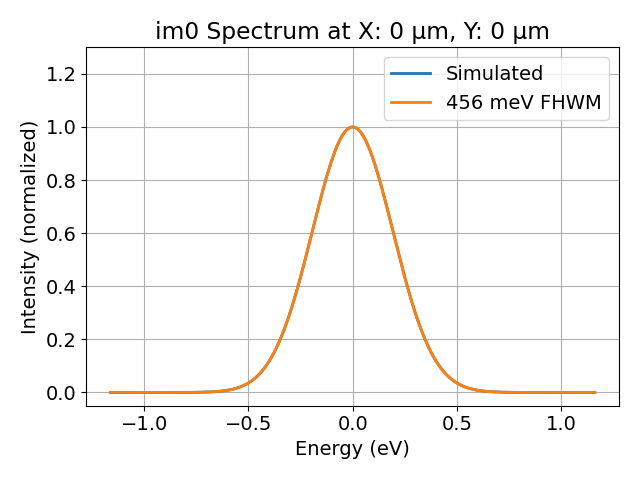

<IPython.core.display.Javascript object>


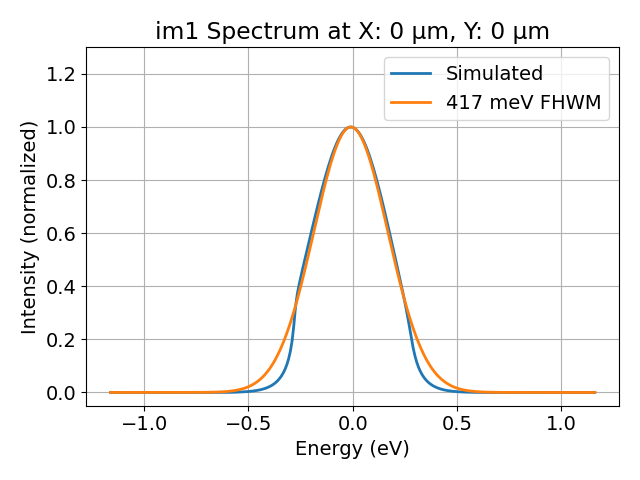

<IPython.core.display.Javascript object>


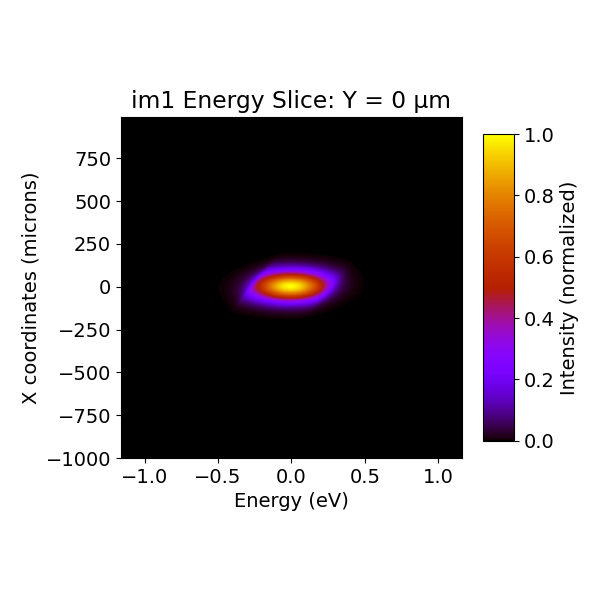

<IPython.core.display.Javascript object>


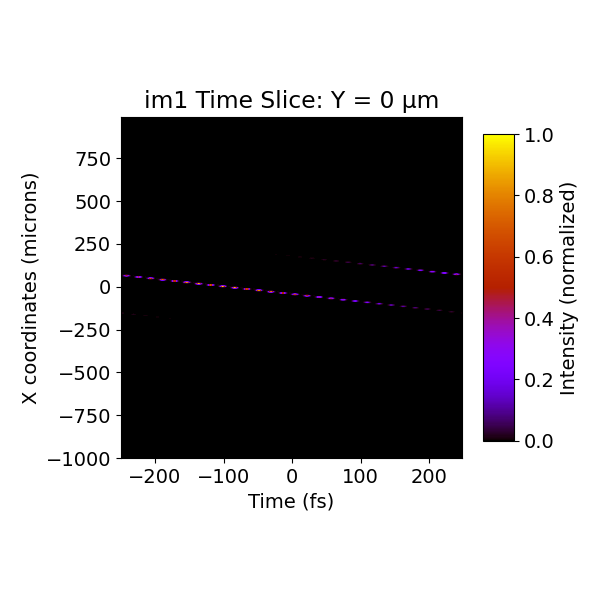

128


In [20]:
pulse_test.plot_spectrum('im0')
pulse_test.plot_spectrum('im1')
pulse_test.imshow_energy_slice('im1')
pulse_test.imshow_time_slice('im1')

In [13]:
1/20

0.05

<IPython.core.display.Javascript object>


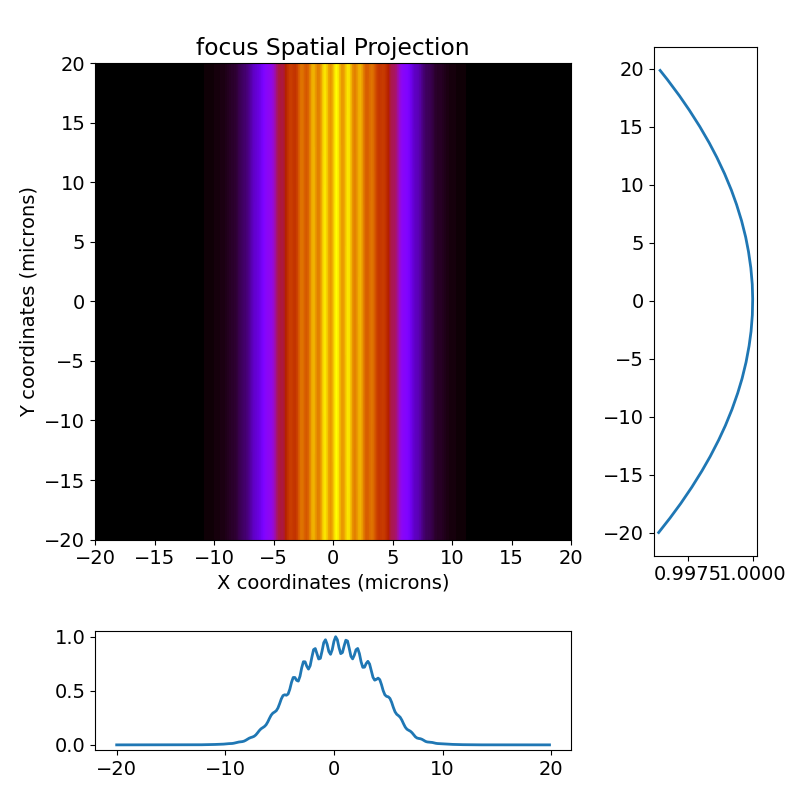

<IPython.core.display.Javascript object>


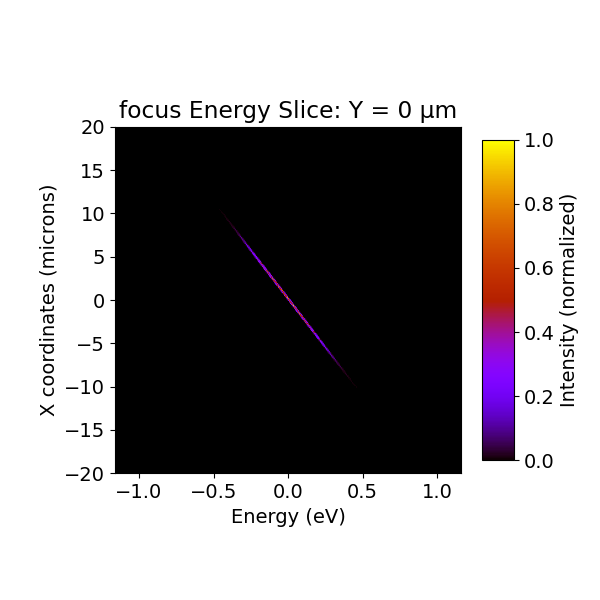

<IPython.core.display.Javascript object>


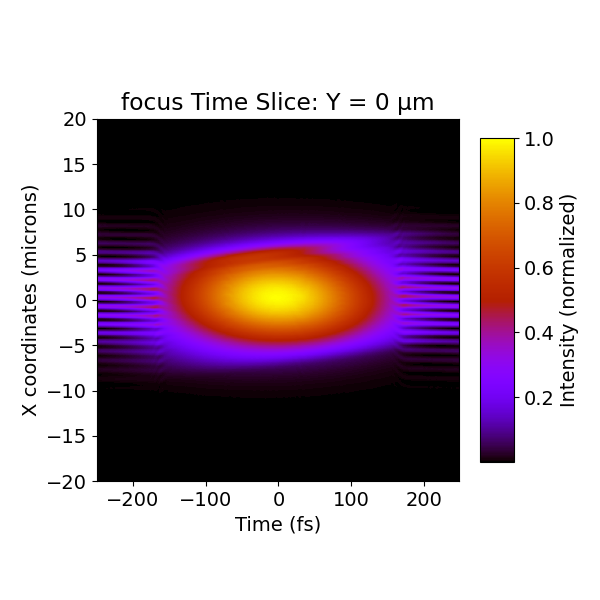

128


/Users/Matt/beamline/venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


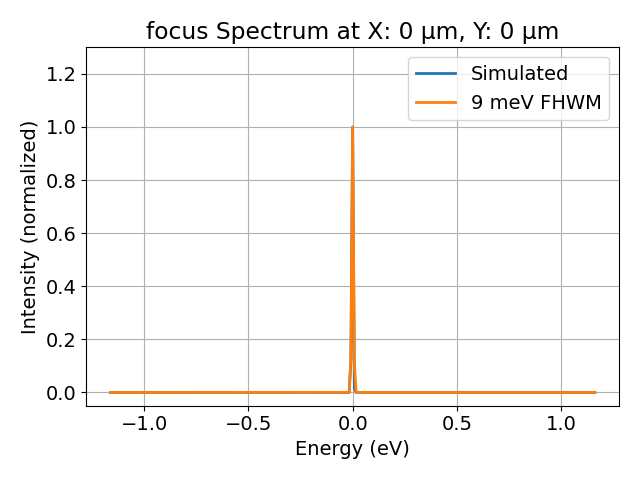

In [22]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/Hasan_mono/figures'

pulse_test.imshow_projection('focus')
pulse_test.imshow_energy_slice('focus')
plt.savefig(figure_path+'/lens_focus.png')
pulse_test.imshow_time_slice('focus')
plt.tight_layout()
pulse_test.plot_spectrum('focus', x_pos=0)

In [10]:
84/(86*2)

0.4883720930232558